In [2]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import ClassDepLossMultilayerPerceptron

In [3]:
# Network Parameters
n_input = 2
n_classes = 2

In [6]:
X, y = datasets.make_circles(n_samples=800, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

('Epoch:', '0001', 'cost=', '0.743310273')
('Epoch:', '0006', 'cost=', '0.721349984')
('Epoch:', '0011', 'cost=', '0.703049034')
('Epoch:', '0016', 'cost=', '0.688112617')
('Epoch:', '0021', 'cost=', '0.677591741')
('Epoch:', '0026', 'cost=', '0.661651999')
('Epoch:', '0031', 'cost=', '0.660403594')
('Epoch:', '0036', 'cost=', '0.655037552')
('Epoch:', '0041', 'cost=', '0.655658752')
('Epoch:', '0046', 'cost=', '0.656950459')
('Epoch:', '0051', 'cost=', '0.652242050')
('Epoch:', '0056', 'cost=', '0.648033500')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

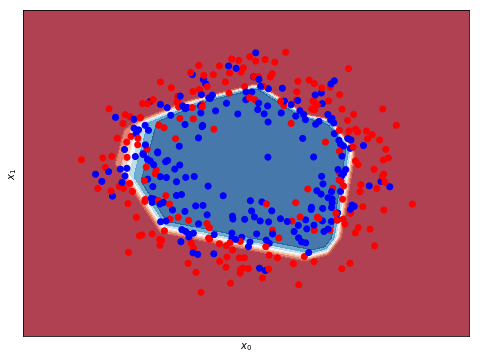

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          beta=0,
                          training_epochs=60,
                          verbose=True)
fit_plot(X_train, Y_train, mp)

# PU setup

In [8]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

('Positive (pct_missing=0.0):', 197, ' vs.', 197)
('Positive (pct_missing=0.1):', 197, ' vs.', 182)
('Positive (pct_missing=0.2):', 197, ' vs.', 148)
('Positive (pct_missing=0.3):', 197, ' vs.', 134)
('Positive (pct_missing=0.4):', 197, ' vs.', 121)
('Positive (pct_missing=0.5):', 197, ' vs.', 94)
('Positive (pct_missing=0.6):', 197, ' vs.', 72)
('Positive (pct_missing=0.7):', 197, ' vs.', 64)
('Positive (pct_missing=0.8):', 197, ' vs.', 36)
('Positive (pct_missing=0.9):', 197, ' vs.', 19)
('Positive (pct_missing=1.0):', 197, ' vs.', 0)


('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.854682922')
('Epoch:', '0006', 'cost=', '0.802193701')
('Epoch:', '0011', 'cost=', '0.801353753')
('Epoch:', '0016', 'cost=', '0.797440067')
('Epoch:', '0021', 'cost=', '0.793724805')
('Epoch:', '0026', 'cost=', '0.790479288')
('Epoch:', '0031', 'cost=', '0.787230596')
('Epoch:', '0036', 'cost=', '0.785715759')
('Epoch:', '0041', 'cost=', '0.786161870')
('Epoch:', '0046', 'cost=', '0.785119936')
('Epoch:', '0051', 'cost=', '0.783396617')
('Epoch:', '0056', 'cost=', '0.781808779')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

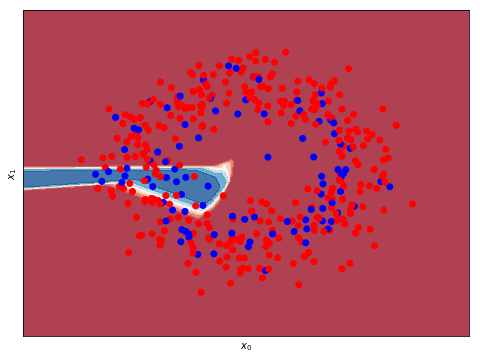

In [9]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          beta=0,
                          training_epochs=60,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '1.074651718')
('Epoch:', '0006', 'cost=', '1.019901171')
('Epoch:', '0011', 'cost=', '1.005344242')
('Epoch:', '0016', 'cost=', '0.995925635')
('Epoch:', '0021', 'cost=', '0.990676627')
('Epoch:', '0026', 'cost=', '0.989449352')
('Epoch:', '0031', 'cost=', '0.988700822')
('Epoch:', '0036', 'cost=', '0.983941033')
('Epoch:', '0041', 'cost=', '0.985495195')
('Epoch:', '0046', 'cost=', '0.983052224')
('Epoch:', '0051', 'cost=', '0.981782705')
('Epoch:', '0056', 'cost=', '0.980585009')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

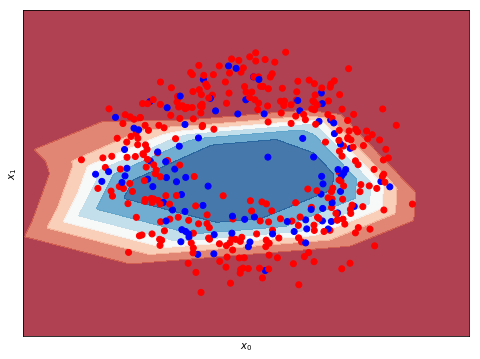

In [11]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          beta=0,
                          training_epochs=60,
                          class_weight=[.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.544209816')
('Epoch:', '0006', 'cost=', '0.417603850')
('Epoch:', '0011', 'cost=', '0.417503543')
('Epoch:', '0016', 'cost=', '0.417503521')
('Epoch:', '0021', 'cost=', '0.417503506')
('Epoch:', '0026', 'cost=', '0.417503521')
('Epoch:', '0031', 'cost=', '0.417503521')
('Epoch:', '0036', 'cost=', '0.417503521')
('Epoch:', '0041', 'cost=', '0.417503513')
('Epoch:', '0046', 'cost=', '0.417503528')
('Epoch:', '0051', 'cost=', '0.417503506')
('Epoch:', '0056', 'cost=', '0.417503536')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

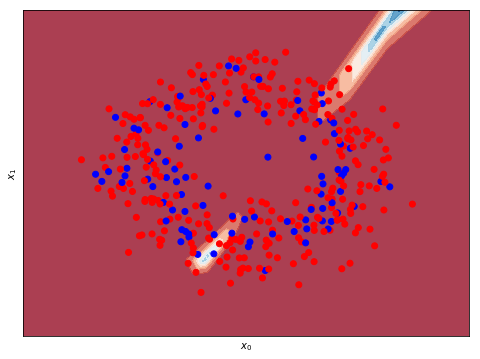

In [12]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          beta=0,
                          training_epochs=60,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp)